Estimated Area of Circle: 3.14224
Estimated Area of Square: 0.99964
Ratio of Points in Square to Points in Circle: 0.3181297418402159
Ratio of Area of Square to Area of Circle: 0.31812974184021586


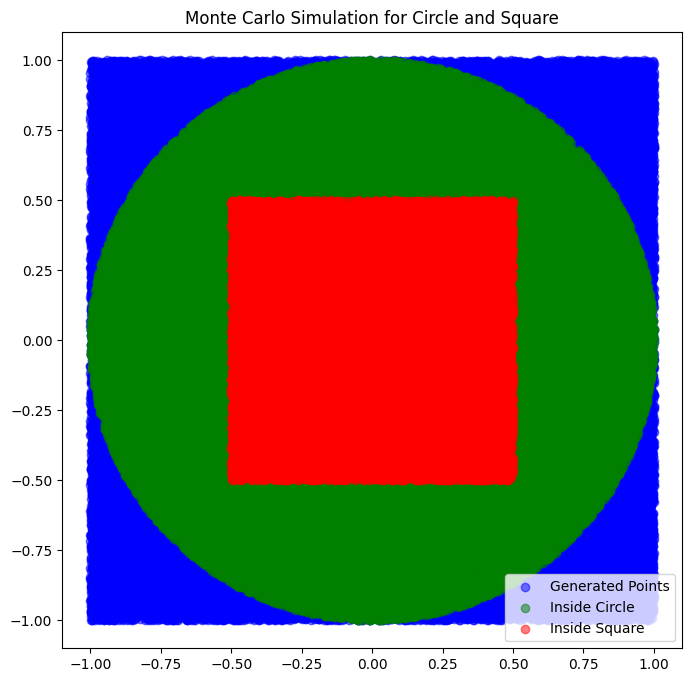

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(num_points):
    # Generate random points within a square [-1, 1] x [-1, 1]
    points = np.random.rand(num_points, 2) * 2 - 1
    return points

def is_inside_circle(x, y):
    # Check if a point (x, y) is inside the circle (unit circle centered at the origin)
    return x**2 + y**2 <= 1

def is_inside_square(x, y):
    # Check if a point (x, y) is inside the square
    return (-0.5 <= x <= 0.5) and (-0.5 <= y <= 0.5)

def monte_carlo_simulation(num_points):
    points = generate_points(num_points)

    circle_points = sum(1 for x, y in points if is_inside_circle(x, y))
    square_points = sum(1 for x, y in points if is_inside_square(x, y))

    circle_area = circle_points / num_points *4 # Area of the circle (pi * r^2, r=1)
    square_area = square_points / num_points *4  # Area of the square

    ratio_points = square_points / circle_points
    area_ratio = square_area / circle_area

    print(f"Estimated Area of Circle: {circle_area}")
    print(f"Estimated Area of Square: {square_area}")
    print(f"Ratio of Points in Square to Points in Circle: {ratio_points}")
    print(f"Ratio of Area of Square to Area of Circle: {area_ratio}")

    # Plot the points
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.5, label='Generated Points')
    plt.scatter([point[0] for point in points if is_inside_circle(point[0], point[1])],
                [point[1] for point in points if is_inside_circle(point[0], point[1])],
                c='green', alpha=0.5, label='Inside Circle')
    plt.scatter([point[0] for point in points if is_inside_square(point[0], point[1])],
                [point[1] for point in points if is_inside_square(point[0], point[1])],
                c='red', alpha=0.5, label='Inside Square')

    plt.title('Monte Carlo Simulation for Circle and Square')
    plt.legend()
    plt.show()

# Number of points in the simulation
num_points = 100000

# Run the Monte Carlo simulation
monte_carlo_simulation(num_points)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the sales data
sales_data = pd.read_csv("sales_data.csv")
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data = sales_data.set_index('date')

# Create a variable for the fixed store size
sales_data['fixed_size'] = 14197

FileNotFoundError: [Errno 2] No such file or directory: 'sales_data.csv'

In [ ]:
sales_data.head()

In [ ]:
# Define the parameters for the simulation (we are running 20 million random scenarios)
mean_sales = sales_data['sales'].mean()
std_sales = sales_data['sales'].std()
num_iterations = 20000000
expanded_size = 50000

In [ ]:
# Run the Monte Carlo simulation
incremental_sales = []
for i in range(num_iterations):
    sampled_sales = np.random.normal(mean_sales, std_sales)
    original_sales = sampled_sales * (14197 / 15000)
    expanded_sales = sampled_sales * (expanded_size / 15000)
    incremental_sales.append(expanded_sales - original_sales)

In [ ]:
# Plot the distribution of incremental sales
plt.hist(incremental_sales, bins=50, density=True)
plt.xlabel("Incremental Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Incremental Sales from Expansion")
plt.show()

In [ ]:
# Calculate the mean and standard deviation of incremental sales
mean_incremental_sales = np.mean(incremental_sales)
std_incremental_sales = np.std(incremental_sales)

In [ ]:
# Print the results
print("Mean incremental sales:", mean_incremental_sales)
print("Standard deviation of incremental sales:", std_incremental_sales)

In [ ]:
# Compare the mean sales for each scenario
if mean_incremental_sales > mean_sales:
    print("Expanding the store size is expected to generate incremental sales.")
else:
    print("Expanding the store size is not expected to generate incremental sales.")